<a href="https://colab.research.google.com/github/lynnqian/JSC270_Assg2/blob/YufanQian/Assignment_3_YufanQian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3**

part 1: Bayesian Simulation


In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
np.random.seed(12)

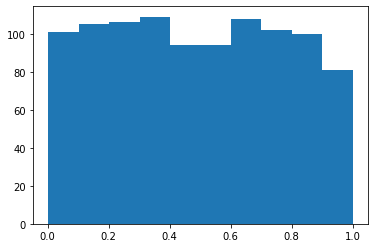

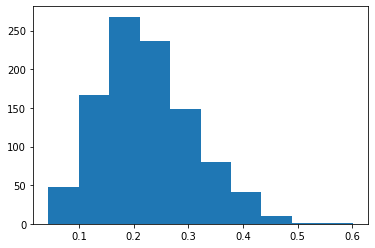

In [164]:
# function for generating one beta distribution
def my_dist(a, b):
  x = np.random.beta(a,b)
  return x
# function for generating n beta distributions
def my_dist_sampler(n, a, b):
  my_sample = [my_dist(a, b) for i in range(n)]
  return my_sample
# function for calculating the mean of all n distributions
def mean(n, a, b):
  return np.mean(my_dist_sampler(n, a, b))

# simulates 1000 draws from the prior distribution derived
prior = plt.hist(my_dist_sampler(1000, 1, 1))
plt.show()
# simulates 1000 draws from the posterior distribution derived
posterior = plt.hist(my_dist_sampler(1000, 5, 17))
plt.show()

In [165]:
# calculate the prior mean
prior_mean = mean(1000, 1, 1)
prior_mean

0.4924469516388849

In [166]:
# calculate the posterior mean
posterior_mean = mean(1000, 5, 17)
posterior_mean

0.2306922161673938

In [167]:
# the traditional likelihood estimate
estimate = 4/20
estimate

0.2

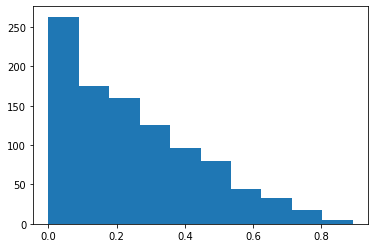

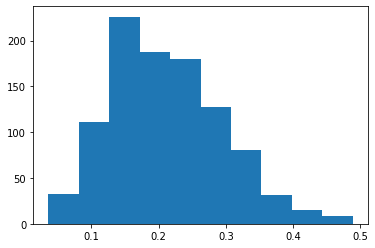

In [168]:
# new parameters: a = 1 and b = 3
# simulates 1000 draws from the prior distribution derived
prior = plt.hist(my_dist_sampler(1000, 1, 3))
plt.show()
# simulates 1000 draws from the posterior distribution derived
posterior = plt.hist(my_dist_sampler(1000, 5, 19))
plt.show()

In [169]:
# calculate the new prior mean
prior_mean = mean(1000, 1, 3)
prior_mean

0.25767019256848744

In [170]:
# calculate the new posterior mean
posterior_mean = mean(1000, 5, 19)
posterior_mean

0.20693955595425476

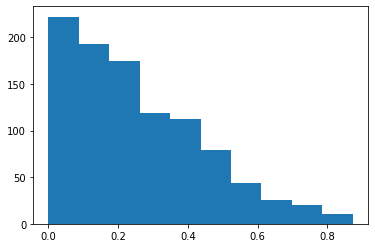

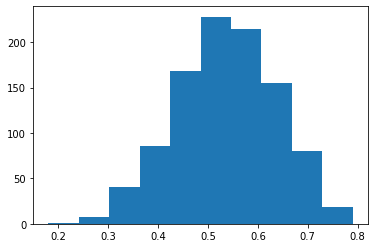

In [171]:
# new parameters: a = 1 and b = 3, different n
# simulates 1000 draws from the prior distribution derived
prior = plt.hist(my_dist_sampler(1000, 1, 3))
plt.show()
# simulates 1000 draws from the posterior distribution derived
posterior = plt.hist(my_dist_sampler(1000, 13, 11))
plt.show()

In [172]:
# calculate the new prior mean
prior_mean = mean(1000, 1, 3)
prior_mean

0.2584947599018071

In [173]:
# calculate the new posterior mean
posterior_mean = mean(1000, 13, 11)
posterior_mean

0.5363642021889823

part 2: Asymptotic Behavior


In [174]:
def expo_dist():
  x = np.random.exponential(1/2)
  return x
# function for generating n exponential distributions
def my_expo_sampler(n):
  my_sample = [expo_dist() for i in range(n)]
  return my_sample
def expo_mean(n):
  return np.mean(my_expo_sampler(n))

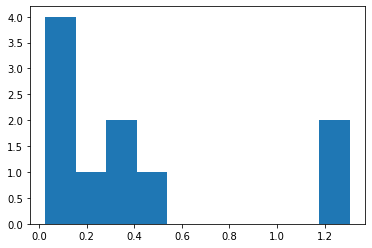

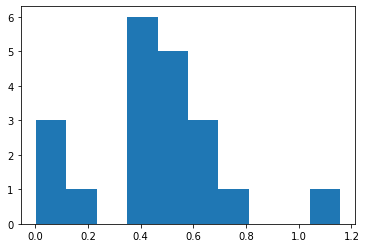

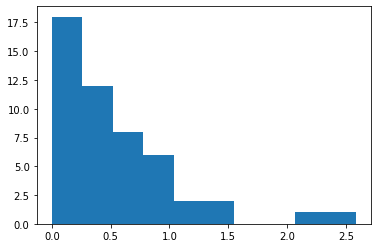

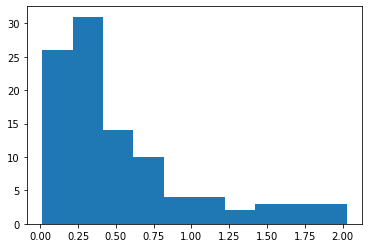

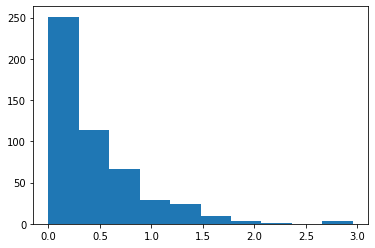

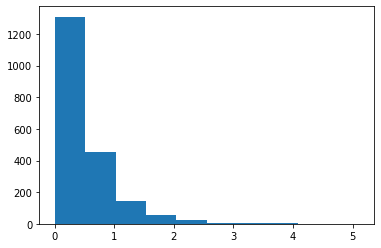

In [175]:
expo_1 = plt.hist(my_expo_sampler(10))
plt.show()
expo_2 = plt.hist(my_expo_sampler(20))
plt.show()
expo_3 = plt.hist(my_expo_sampler(50))
plt.show()
expo_4 = plt.hist(my_expo_sampler(100))
plt.show()
expo_5 = plt.hist(my_expo_sampler(500))
plt.show()
expo_6 = plt.hist(my_expo_sampler(2000))
plt.show()

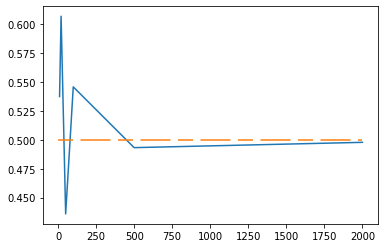

In [176]:
x = (10, 20, 50, 100, 500, 2000)
y = (expo_mean(10), expo_mean(20), expo_mean(50), expo_mean(100), expo_mean(500), expo_mean(2000))
plt.plot(x, y)
x_coordinates = [0, 2000]
y_coordinates = [0.5, 0.5]
plt.plot(x_coordinates, y_coordinates, dashes=[10, 5, 20, 5])
plt.show()

part 3: Bootstrapping and Classification

In [177]:
# step 1: set the seed
np.random.seed(12)

def single_uniform(a, b):
    return np.random.uniform(a, b)

def multiple_uniform(n, a, b):
    my_sample = [single_uniform(a, b) for i in range(n)]
    return my_sample

def multiple_d(n):
    my_sample = np.random.randint(5, size=n)
    return my_sample

# step 2: generate n observations of x1, x2 and d1
x1 = multiple_uniform(1000, -100, 100)
x2 = multiple_uniform(1000, -150, 150)
d1 = multiple_d(1000)

# step 3: generate n observations of epsilon
epsilon_ = multiple_uniform(1000, 0, 4)

# step 4: generate regression line
reg_value = [5 + 0.6 * x1[i] + 0.8 * x2[i] + 0.4 * d1[i] + epsilon_[i] for i in range(1000)]

# step 5: apply the sigmoid function
pie_value = np.exp(reg_value) / (1 + np.exp(reg_value))

# step 6: generate label yi
yi = [int(pie_value[i] > 0.5) for i in range(1000)]

# step extra
Xi = [(x1[i], x2[i], d1[i]) for i in range(1000)]


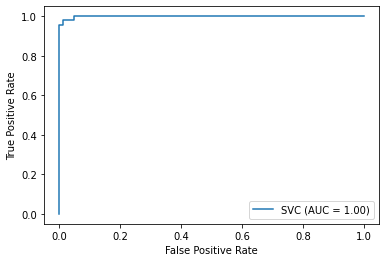

In [178]:
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn import datasets, metrics, model_selection, svm

# Split data into train and test sets using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(Xi, yi, test_size = 0.2, shuffle=True, random_state=12)

# plot the ROC curve
plot = svm.SVC(random_state=12)
plot.fit(X_train,y_train)
metrics.plot_roc_curve(plot, X_test, y_test)
plt.show()

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

np.random.seed(12)

# instantiate array of size 5000
arr = [0 for i in range(5000)]

for i in range(5000): 
  # generate resample i of size 1000 from main sample
  num = np.random.choice(range(1000), size = 1000, replace = True)
  
  # use same num for x and y value
  x = [Xi[i] for i in num]
  y = [yi[i] for i in num]
  
  # fit decision tree classifier
  classifier = DecisionTreeClassifier(random_state=0)
  classifier.fit(x, y)
  
  # remaining observations and predict
  left_x = [Xi[i] for i in range(1000) if i not in num]
  left_y = [yi[i] for i in range(1000) if i not in num]
  predicted_y = classifier.predict(left_x)
  
  # computed metric and add to array
  arr[i] = precision_score(left_y, predicted_y)

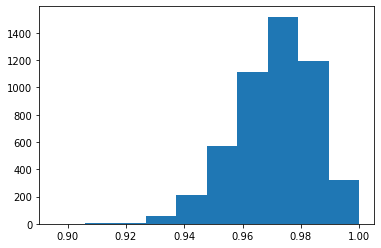

In [180]:
plt.hist(arr)
plt.show()

In [181]:
# mean for part D
np.mean(arr)

0.971443574900714

In [194]:
# value from part A
X_train, X_test, y_train, y_test = train_test_split(Xi, yi, test_size = 0.2, shuffle=True, random_state=12)

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
 
predicted_y = classifier.predict(X_test)
  
result = precision_score(y_test, predicted_y)

In [193]:
result

0.9649122807017544